In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random 
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [98]:
data_i = pd.ExcelFile('temp2.xlsx')

In [113]:
data_img = pd.read_excel(data_i) 

In [114]:
data0 = data_img[0:400]
data2 = data_img[400:500]
data1 = data_img[500:900]
data3 = data_img[900:1000]
data4 = data_img[3500:3600]
data5 = data_img[4500:4600]
data_training = data0.append(data1)
data_testing = data2.append(data3)
data_challenge = data4.append(data5)
data_training = data_training.sample(frac=1)
data_testing = data_testing.sample(frac=1)
data_challenge = data_challenge.sample(frac=1)


In [115]:
w= np.random.uniform(0,0.3,785)
w_copy = w

In [116]:
y_training_bt = [0 for f in range(800)]
s_training_bt = [0 for f in range(800)]
y_actual = np.array(data_training.iloc[:,0])
y_actual_test = np.array(data_testing.iloc[:,0])

for i in range(800):
    s_training_bt[i] = np.dot(data_training.iloc[i,1:],w_copy)
    #y_training = s_training
    if s_training_bt[i] > 0 :
        y_training_bt[i] = 1
    else:
        y_training_bt[i] = 0

In [117]:
tn1, fp1, fn1, tp1= confusion_matrix(y_actual,y_training_bt).ravel()
print("TN:",tn1,"FP",fp1,"FN:",fn1,"TP:",tp1)
p1 = (tp1/(tp1+fp1))
r1 = (tp1/(tp1+fn1))
f11 = 2*((p1*r1)/(p1+r1))
print("p=",p1,"r=",r1,"f1=",f11)

TN: 0 FP 400 FN: 0 TP: 400
p= 0.5 r= 1.0 f1= 0.6666666666666666


In [148]:
w= np.random.uniform(0,0.8,785)

s_training = [0 for f in range(800)]
y_training = [0 for f in range(800)]
s_testing = [0 for f in range(200)]
y_testing = [0 for f in range(200)]
s_challenge = [0 for f in range(200)]
y_challenge = [0 for f in range(200)]
y_actual = np.array(data_training.iloc[:,0])
y_actual_test = np.array(data_testing.iloc[:,0])
error = [0 for i in range(21)]
error2 = [0 for i in range(21)]
n = 0.005 #LEARNING RATE

for k in range (21): #k IS EPOCH 
  error_training = 0
  error_testing = 0
  for i in range(800):
      s_training[i] = np.dot(data_training.iloc[i,2:],w[1:]) + w[0]
      if s_training[i] > 0 :
          y_training[i] = 1
      else:
          y_training[i] = 0
      w = w + n*(y_actual[i]-y_training[i])*(data_training.iloc[i,1:])
      if (y_actual[i] != y_training[i]):
        error_training = error_training + 1
  
  for j in range(200):
     s_testing[j] = np.dot(data_testing.iloc[j,2:],w[1:]) + w[0]
     if s_testing[j] > 0:
       y_testing[j] = 1
     else:
       y_testing[j] = 0
     if (y_testing[j] != y_actual_test[j]):
       error_testing = error_testing + 1

  error[k] = error_training/800
  error2[k] = error_testing/200

print(error2)
print(error)

[0.035, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.015, 0.015, 0.015, 0.015, 0.015, 0.015, 0.015, 0.015, 0.015, 0.015, 0.01, 0.015, 0.015, 0.015]
[0.24875, 0.01625, 0.01, 0.00625, 0.005, 0.005, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.00125, 0.0025, 0.00375, 0.00125, 0.00125, 0.0025, 0.0025, 0.00125, 0.0, 0.0]


In [149]:
tn2, fp2, fn2, tp2= confusion_matrix(y_actual,y_training).ravel()
print("TN:",tn2,"FP",fp2,"FN:",fn2,"TP:",tp2)
p2 = (tp2/(tp2+fp2))
r2 = (tp2/(tp2+fn2))
f12 = 2*((p2*r2)/(p2+r2))
print("p=",p2,"r=",r2,"f1=",f12)

TN: 400 FP 0 FN: 0 TP: 400
p= 1.0 r= 1.0 f1= 1.0


In [150]:
# y_actual_test = np.array(data_testing.iloc[:,0])
# error2 = [0 for i in range(21)]

# for i in range(21): #epoch
#   error_testing = 0.0
#   for j in range(200):
#     s_testing[j] = np.dot(data_testing.iloc[j,2:],w_copy[1:]) + w_copy[0]
#     if s_testing[j] > 0:
#       y_testing[j] = 1
#     else:
#       y_testing[j] = 0
#     if (y_testing[j] != y_actual_test[j]):
#       # print(y_testing[j] == y_actual_test[j])
#       error_testing = error_testing + 1
#   error2[i] = error_testing/200
# print(error2)

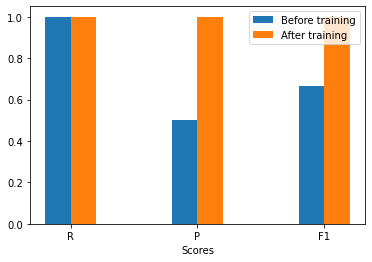

In [151]:
parameter = ['R','P','F1']
values = [r1,p1,f11]
values2 = [r2,p2,f12]
width1 = 0.2
plt.bar(parameter,values, width = width1+0.2, label = 'Before training')
plt.bar(parameter,values2,width = width1, align='edge', label = 'After training')
plt.xlabel('Scores')
plt.legend()
plt.show()

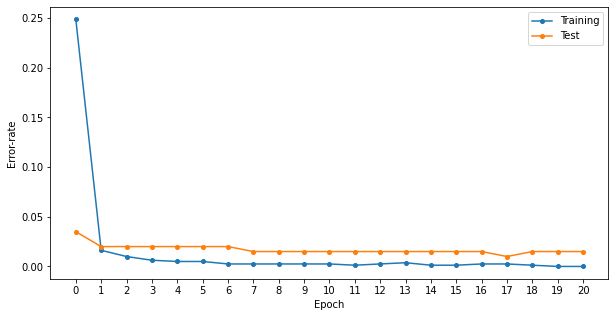

In [152]:
plt.figure(figsize=(10,5))
plt.plot(range(21),error,label = 'Training',marker = 'o',markersize = 4)
plt.plot(range(21),error2,label = 'Test',marker = 'o',markersize = 4)
plt.xticks(range(21))
plt.xlabel("Epoch")
plt.ylabel("Error-rate")
plt.legend()

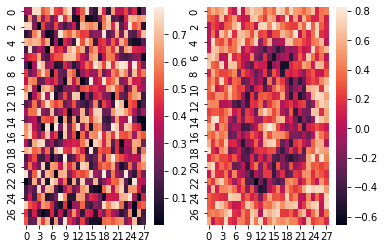

In [153]:
fig, (ax1, ax2) = plt.subplots(1,2)
bx=sns.heatmap(w_copy[1:].reshape(28,28).T,ax=ax1)
a =  np.array(w[1:]).reshape(28,28).T
cx = sns.heatmap(a,ax=ax2)
plt.show()

In [154]:
y_all_C = []

y_challenge=np.zeros(200)
for i in range(200):
    s_challenge[i] = np.dot(data_challenge.iloc[i,1:],w)
    #print(s_testing[i])
    a = w[:1].values
    if (s_challenge[i] > a):
      y_challenge[i] = 1
    else:
      y_challenge[i] = 0

y_all_C = (y_challenge)

In [155]:
x = (data_challenge.iloc[:,0])


sevens_ones = np.where((x ==7)& y_all_C == 1 )
sevens_ones = len(np.array(sevens_ones)[0])
nine_ones = np.where((x==9) & (y_all_C == 1 ))
nine_ones = len(nine_ones[0])
sevens_zeros = np.where((x==7) & (y_all_C == 0 ))
sevens_zeros = len(sevens_zeros[0])
nine_zeros = np.where((x==9) & (y_all_C == 0 ))
nine_zeros = len(nine_zeros[0])

print(sevens_ones)
print()
print((sevens_zeros))
print()
print((nine_ones))
print()
print((nine_zeros))

97

3

96

4


In [156]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(header=dict(values=['', 'Original 7', 'Original 9']),
                 cells=dict(values=[['Detected 1','Detected 0'], [sevens_ones,sevens_zeros], [nine_ones,nine_zeros]]))
                     ])
fig.show()